In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,Convolution2DTranspose,Reshape
from tensorflow.keras.models import Sequential,Model

In [3]:
data=pd.read_csv('/content/drive/My Drive/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
x=data.iloc[:,1:].values
x=x.reshape(len(x),28,28,1)
y=data.iloc[:,1].values

In [13]:
x=x/255

In [17]:
x.shape

(60000, 28, 28, 1)

In [8]:
data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [9]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28,28,1)))
model.add(Convolution2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Convolution2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Convolution2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Convolution2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Convolution2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Convolution2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 8)         1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 26, 26, 16)        1168      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         2

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(x[:50000],x[:50000],epochs=100,batch_size=64)

Epoch 1/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 4/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 8/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 9/100
782/782 [==============================] - 5s 6ms/step - loss: 1.5612e-08 - accuracy: 0.2966
Epoch 10/100
782/782 [==============================] -

In [21]:
prediction=model.predict(x[50000:50002])

In [22]:
prediction.shape

(2, 28, 28, 1)

In [23]:
import matplotlib.pyplot as plt

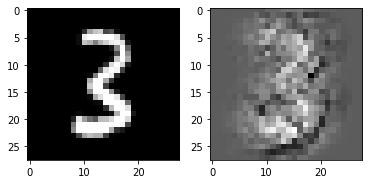

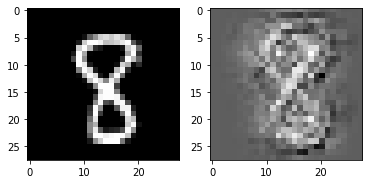

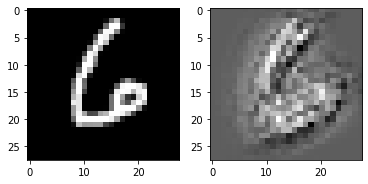

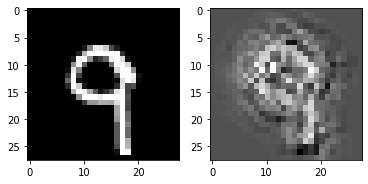

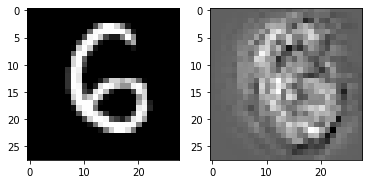

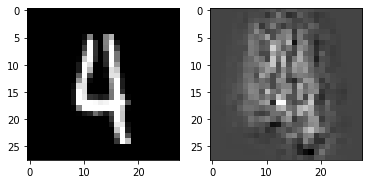

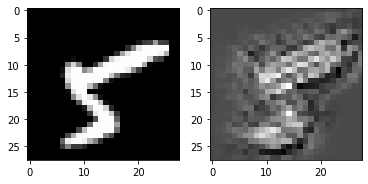

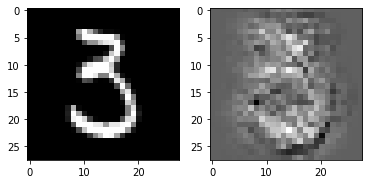

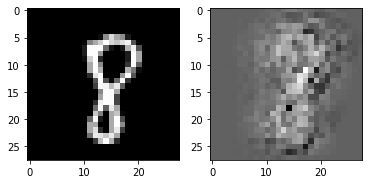

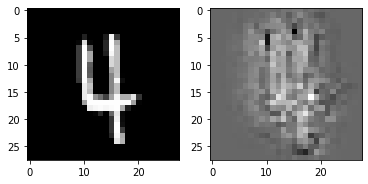

In [37]:
for i in range(50000,50010):
  m=x[i].reshape(1,28,28,1)
  plt.subplot(1,2,1)
  plt.imshow(m.reshape(28,28),cmap=plt.cm.gray)
  plt.subplot(1,2,2)
  prediction=model.predict(m)
  plt.imshow(prediction.reshape(28,28),cmap=plt.cm.gray)
  plt.show()

In [50]:
l=model.to_json()
with open('autoencoder.json','w') as p:
  p.write(l)
model.save_weights('autoencoder.h5') 